
*********************************naïve Bayes Classifiers*********************************


Accuracy: 72.7273%, recall: 68.2353%, precision: 61.7021%

for class (tested_negative) the color is: blue
for class (tested_positive) the color is: green


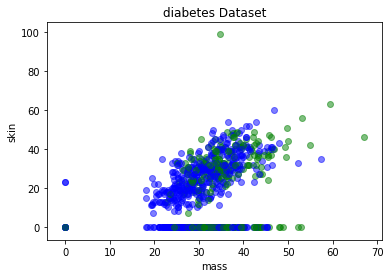

In [4]:

import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math

#1. Load the data from CSV file.
dataset=pd.read_csv('diabetes_csv.csv')
header=list(dataset)#data key header

#-----------------------------------------------------------------------------------------------------

#2. Shuffle and split the dataset into training and test datasets
dataset=dataset.sample(frac=1)           #generate a sample random data from the data frame
training=dataset[:int(len(dataset)*0.7)] #70% of the dataset for the training
testing=dataset[int(len(dataset)*0.7):]  #30% of the dataset for the testing

#-----------------------------------------------------------------------------------------------------

#3. Split your training by class, compute mean, variance of the feature in each class.
classes= training.groupby(header[-1])       #using groupby with the class to split traning data
means=classes[header[:-1]].agg(np.mean)     #using np.mean to fill means set by the mean for each featurs in each class
variances=classes[header[:-1]].agg(np.var)  #using np.var to fill means set by the vareince for each featurs in each class

#-----------------------------------------------------------------------------------------------------

#4. Calculate the prior and conditional probabilities.
def gaussainNB(tester):
    prob = {}   # probabilities of test value for each class will be here with class name as key
    
    for name, group in classes: #loop to go over each class by its name
        
        prob[name] = 1   #name is the class name first will defiend as 1 for multiplaying
        
        for i in range(len(tester)-1): #loop to go over all featerus in test row
            
            mean= means.loc[name, header[i]]#get the mean for that feater(header[i]) for that class (name)
            stdev= math.sqrt(variances.loc[name, header[i]]) #get the var for that feater(header[i]) for that class (name)
                                                             #then compute the stdver by sqaur root of it
                
            part = math.exp(-(math.pow(tester[i]-mean,2)/(2*math.pow(stdev,2))))#gaussain NP
            prob[name] *= part / (math.sqrt(2*math.pi) * stdev)                 #gaussain NP THEN mult it with other featers 
                                                                                #probility to comput the hole class probility
    
    
    maxProb=-1 # varabile to save the highest probilty among classes
    for classname, probability in prob.items():#go over the class and its probility
        if (maxProb<probability):
            maxProb=probability
            classvalue=classname
    return classvalue #the prediction class with highset probility
#-----------------------------------------------------------------------------------------------------


#5. Make prediction on the testing set.
prediction=[]
for i in range(len(testing)):#go over all testset one by one and get its prediation
    prediction.append(gaussainNB(testing.iloc[i]))#append the prediction class to the prediction list using gaussain method
    
#-----------------------------------------------------------------------------------------------------

#6. Compute the accuracy, precision, and recall.
correct=0 #real class = predict class
TP=0      #real and predict class is tested positive
FN=0      #wrong predict class and its tested negitive
FP=0      #wrong predict class and its tested positive

for i in range(len(testing)):#go over all testset
    if (testing.iloc[i][-1]==prediction[i]):#check if real class = predict class
        correct+=1 
        if prediction[i]=='tested_positive':TP+=1#check if the right predict class is tested positive
            
    elif prediction[i]=='tested_negative':FN+=1  #check if the wrong predict class is tested negaitive
    else : FP+=1                                 #check if the wrong predict class is tested positive
        
        
        
accuracy= (correct*1.0/len(testing))*100   # accuracy: (tp + tn) / (p + n)
recall=(TP*1.0/(TP+FN)) *100               # recall: tp / (tp + fn)  
precision=(TP*1.0/(TP+FP)) *100            # precision: tp / (tp + fp)



print('\n*********************************naïve Bayes Classifiers*********************************\n\n')
print(('Accuracy: {:.4f}%, recall: {:.4f}%, precision: {:.4f}%\n').format(accuracy , recall ,precision))         
    
#-----------------------------------------------------------------------------------------------------

#7. Plot a scatter plot of the data, coloring each data point by its class
colors = {}
mapping=['blue','green','red','yellow','white']
z=0
for name, group in classes:
    colors[name]=[mapping[z]]
    z+=1
    print('for class ({0}) the color is: {1}'.format(name,colors[name][0]))
fig, ax = plt.subplots()

ax.set_title('diabetes Dataset')
ax.set_xlabel('mass')
ax.set_ylabel('skin')

for i in range(len(dataset)):
    ax.scatter(dataset[header[5]][i], dataset[header[3]][i],c=colors[dataset['class'][i]],alpha=0.5)
    
#-----------------------------------------------------------------------------------------------------    
    